4090


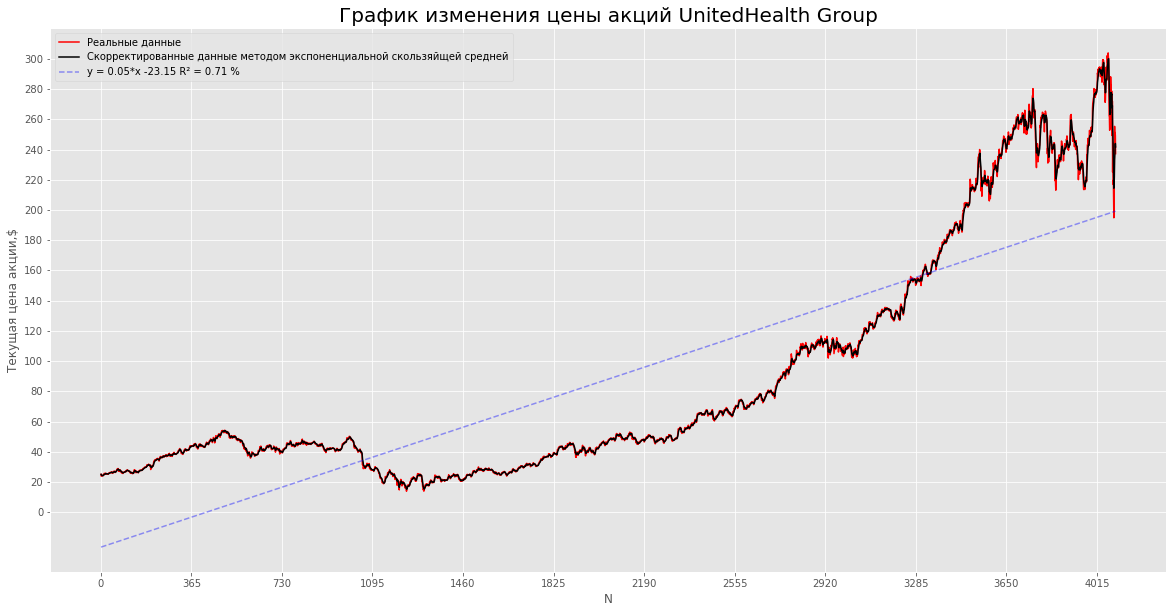

In [48]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import math 
import csv

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
#from sklearn.metrics import mean_squared_error, r2_Score


df = pd.read_csv("UHG.csv", sep = ";")

maxN=maxN=df.N.max()
maxN=int(maxN)

B=df.Price[0:maxN]


#EMA- экспоненциальная взвешенная скользящая средняя.
EMA=[]
a=B[0]
for i in range(1,maxN,1):
    
    EMA.append(a)
    a=(1/3)*B[i]+(2/3)*a
    
EMA.append(a)
Price=df.Price[0:maxN]  
    
A=df.N[0:maxN]



Q=df.N[0:maxN]

fig  ,ax = plt.subplots(figsize=(20, 10))
ax.plot(Q,B, linestyle='-', color='Red', marker='', label='Реальные данные', )

ax.plot(A,EMA, linestyle='-', color='black', marker='', label='Cкорректированные данные методом экспоненциальной скользяйщей средней', )

x=Q
Y=y = coef_b*x + coef_a

ax.plot(x,Y, linestyle='--', color='blue', alpha=0.4, label='y = 0.05*x -23.15 R² = 0.71 %')

ax.set_title('График изменения цены акций UnitedHealth Group',fontsize=20)


ax.set_xlabel("N")
ax.set_ylabel("Текущая цена акции,$")
ax.legend(loc='best')

ax.set_xticks(np.arange(0,maxN,365))
ax.set_yticks(np.arange(0,320,20))



fig.savefig('./graf1.png')

print(maxN)

In [49]:
#МНК для исходных данных
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("UHG.csv", sep = ";")
B=df.N[0:maxN]
A=df.Price[0:maxN]

for i in range(0,maxN,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,A[i])

model = LinearRegression()
model.fit(x, y)

round(2.65, 1)

coef_deter = model.score(x, y)
print(color.BOLD +'Коэффициент детерминации линйеной регресии ='+ color.END, round(coef_deter,2),'%')

coef_a=model.intercept_
coef_b=model.coef_[0]
print( color.BOLD + 'Оценка параметра a линйеной регресии ='+ color.END, round(coef_a,2))
print( color.BOLD +'Оценка параметра b линйеной регресии ='+ color.END,round(coef_b,2))



Коэффициент детерминации линйеной регресии = 0.71 %
Оценка параметра a линйеной регресии = -23.15
Оценка параметра b линйеной регресии = 0.05


In [50]:
#Cтроим аддитивную модель


SMark=[]
for i in range (0,maxN,1):
    SMark.append(A[i]-EMA[i])

        


sum1=SMark[0]
sum2=SMark[1]
sum3=SMark[2]
sum4=SMark[3]
sum5=SMark[4]
for i in range(5,maxN,1):
    if((i-5)%5==0):
        sum1+=SMark[i]
    if((i-5)%5==1):
        sum2+=SMark[i]
    if((i-5)%5==2):
        sum3+=SMark[i]
    if((i-5)%5==3):
        sum4+=SMark[i]
    if((i-5)%5==4):
        sum5+=SMark[i]

avgsum1=sum1/(maxN/5)
avgsum2=sum2/(maxN/5)
avgsum3=sum3/(maxN/5)
avgsum4=sum4/(maxN/5)
avgsum5=sum5/(maxN/5)

coravgsum1=avgsum1-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum2=avgsum2-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum3=avgsum3-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum4=avgsum4-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
coravgsum5=avgsum5-((avgsum1+avgsum2+avgsum3+avgsum4+avgsum5)/5)
print(color.BOLD +'Bыполним проверку: сумма скорректированных сезонных компонент должна быть равна нулю:'+ color.END)

zero=coravgsum1+coravgsum2+coravgsum3+coravgsum4+coravgsum5
print(color.BOLD +'Сумма скорректированных сезонных компонент='+ color.END,round(zero,1))

#SMark- оценка сезонной компоненты
#sum(i)-сумма оценок сезонных компонент для каждого дня недели
#avgsum(i)-средняя от sum(i)
#coravgsum(i)-скорректированная среднняя sum(i)

#YS=Т+Е в аддитивной модели
YS=[]

for i in range(0,maxN,1):
    if((i-5)%5==0):
        YS.append(A[i]-coravgsum1)
    if((i-5)%5==1):
        YS.append(A[i]-coravgsum2)
    if((i-5)%5==2):
        YS.append(A[i]-coravgsum3)
    if((i-5)%5==3):
        YS.append(A[i]-coravgsum4)
    if((i-5)%5==4):
        YS.append(A[i]-coravgsum5)
#print(YS)
        

    


#Считаем значения Т-трендовой составляющей

T=[]
for i in range(1,maxN+1,1):
    T.append(coef_a+coef_b*i)
#print(T)






#Находим прогнозные значения по аддитивной модели ряда
TS=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        TS.append(T[i]+coravgsum1)
    if((i-5)%5==1):
        TS.append(T[i]+coravgsum2)
    if((i-5)%5==2):
        TS.append(T[i]+coravgsum3)
    if((i-5)%5==3):
        TS.append(T[i]+coravgsum4)
    if((i-5)%5==4):
        TS.append(T[i]+coravgsum5)
        
        
#Находим случайную составляющую E
E=[]

for i in range(0,maxN,1):
    E.append(A[i]-TS[i])
#print(E) 


#найдем сумму квадратов отклонениц для линейной аддитивной модели
RSS_Add=0
for i in range (0,maxN,1):
    RSS_Add+=(E[i]*E[i])
#print(RSS_Add)



print( color.BOLD +'Сумма квадратов отклонений линейной аддитивной  модели ='+ color.END,round(RSS_Add,2))




Bыполним проверку: сумма скорректированных сезонных компонент должна быть равна нулю:
Сумма скорректированных сезонных компонент= 0.0
Сумма квадратов отклонений линейной аддитивной  модели = 6969961.72


In [51]:
#Строим мультипликативную модель 


#SMark_Multi- оценка сезонной компоненты мультипликативной модели
SMark_Multi=[]
for i in range (0,maxN,1):
    SMark_Multi.append(A[i]/EMA[i])

        

#Multi_sum(i)-сумма оценок сезонных компонент для каждого дня недели
Multi_sum1=SMark_Multi[0]
Multi_sum2=SMark_Multi[1]
Multi_sum3=SMark_Multi[2]
Multi_sum4=SMark_Multi[3]
Multi_sum5=SMark_Multi[4]
for i in range(5,maxN,1):
    if((i-5)%5==0):
        Multi_sum1+=SMark_Multi[i]
    if((i-5)%5==1):
        Multi_sum2+=SMark_Multi[i]
    if((i-5)%5==2):
        Multi_sum3+=SMark_Multi[i]
    if((i-5)%5==3):
        Multi_sum4+=SMark_Multi[i]
    if((i-5)%5==4):
        Multi_sum5+=SMark_Multi[i]

#AMSum(i)-средняя от Multi_sum(i)

AMSum1=Multi_sum1/(maxN/5)
AMSum2=Multi_sum2/(maxN/5)
AMSum3=Multi_sum3/(maxN/5)
AMSum4=Multi_sum4/(maxN/5)
AMSum5=Multi_sum5/(maxN/5)

#Найдем корректирующий коэффициент 
kor_coef=5/(AMSum1+AMSum2+AMSum3+AMSum4+AMSum5)

print(color.BOLD +'Корректирующий коэффициент равен='+ color.END, round(kor_coef,4))

#CAMSum(i)-скорректированная среднняя sum(i)
CAMSum1=AMSum1*kor_coef
CAMSum2=AMSum2*kor_coef
CAMSum3=AMSum3*kor_coef
CAMSum4=AMSum4*kor_coef
CAMSum5=AMSum5*kor_coef

#сделаем проверку суммы CAMSum(i)
five=CAMSum1+CAMSum2+CAMSum3+CAMSum4+CAMSum5
#print(five)

print(color.BOLD + "Сумма сезонных компонент по мультипликативной модели равна"+ color.END, round(five,2))

#YS_Multi=Yt/Si в мультипликативной модели модели

YS_Multi=[]

for i in range(0,maxN,1):
    if((i-5)%5==0):
        YS_Multi.append(A[i]/CAMSum1)
    if((i-5)%5==1):
        YS_Multi.append(A[i]/CAMSum2)
    if((i-5)%5==2):
        YS_Multi.append(A[i]/CAMSum3)
    if((i-5)%5==3):
        YS_Multi.append(A[i]/CAMSum4)
    if((i-5)%5==4):
        YS_Multi.append(A[i]/CAMSum5)
        




#Находим прогнозные значения по   мультипликативной модели ряда
TS_Multi=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        TS_Multi.append(T[i]*CAMSum1)
    if((i-5)%5==1):
        TS_Multi.append(T[i]*CAMSum2)
    if((i-5)%5==2):
        TS_Multi.append(T[i]*CAMSum3)
    if((i-5)%5==3):
        TS_Multi.append(T[i]*CAMSum4)
    if((i-5)%5==4):
        TS_Multi.append(T[i]*CAMSum5)
#print(TS_Multi)

#Находим случайную составляющую E

E_Multi=[]

for i in range(0,maxN,1):
    E_Multi.append(A[i]/TS_Multi[i])
#print(E_Multi)     


#найдем сумму квадратов отклонениц для линейной Мультипликативной модели
RSS_Multi=0
for i in range (0,maxN,1):
    RSS_Multi+=(E_Multi[i]*E_Multi[i])


print( color.BOLD +'Сумма квадратов отклонений линейной мультипликативной  модели ='+ color.END,round(RSS_Multi,2))


#Найдем критерий Дарбина_Уотсона
#найдем сумму(E(i)-E(i-1))^2
sumd_Multi=0
for i in range(1,maxN,1):
    sumd_Multi+=((E_Multi[i]-E_Multi[i-1])**2)
    #print(sumd_Multi)

d_Multi=((sumd_Multi/RSS_Multi))
print( color.BOLD +'Критерий Дарбина-Уотсона='+ color.END,round(d_Multi,6))


    




Корректирующий коэффициент равен= 0.999
Сумма сезонных компонент по мультипликативной модели равна 5.0
Сумма квадратов отклонений линейной мультипликативной  модели = 9141203.19
Критерий Дарбина-Уотсона= 2.007936


In [52]:
#Построим экспоненциальную модель врменного ряда
LNY=[]
for i in range(0,maxN,1):
    LNY.append(math.log(A[i]))
#найдем оценки параметров  уравнения регрессии МНК

x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("UHG.csv", sep = ";")
B=df.N[0:maxN]


for i in range(0,maxN,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,LNY[i])

model = LinearRegression()
model.fit(x, y)



exp_coef_deter = model.score(x, y)
print(color.BOLD +'Коэффициент детерминации экспоненциальной модели регресии ='+ color.END, round(exp_coef_deter,2),'%')

exp_coef_a=model.intercept_
exp_coef_b=model.coef_[0]
print( color.BOLD + 'Оценка параметра a экспоненциальной модели регресии ='+ color.END, round(exp_coef_a,2))
print( color.BOLD +'Оценка параметра b экспоненциальной модели регресии ='+ color.END,round(exp_coef_b,4))







#Рассчитаем трендовую составляющию для экспоненциальной модели.

exp_T=[]

for i in range(0,maxN,1):
    
    exp_T.append(math.exp(exp_coef_a+exp_coef_b*(i+1)))

    
    
    
    


#Находим прогнозные значения по exp  мультипликативной модели ряда
exp_TS_Multi=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        exp_TS_Multi.append(exp_T[i]*CAMSum1)
    if((i-5)%5==1):
        exp_TS_Multi.append(exp_T[i]*CAMSum2)
    if((i-5)%5==2):
        exp_TS_Multi.append(exp_T[i]*CAMSum3)
    if((i-5)%5==3):
        exp_TS_Multi.append(exp_T[i]*CAMSum4)
    if((i-5)%5==4):
        exp_TS_Multi.append(exp_T[i]*CAMSum5)



#Находим случайную составляющую E для exp модели

exp_E_Multi=[]

for i in range(0,maxN,1):
    exp_E_Multi.append(A[i]/exp_TS_Multi[i])
#print(exp_E_Multi)   

#найдем сумму квадратов отклонениц для экспоненциальной мультипликативной модели
RSS_exp=0
float(RSS_exp)

for i in range (0,maxN,1):
    RSS_exp+=(exp_E_Multi[i]*exp_E_Multi[i])
print( color.BOLD +'Сумма квадратов отклонений экспоненциальной модели ='+ color.END,round(RSS_exp,2))




#найдем сумму(E(i)-E(i-1))^2
sumd=0
for i in range(1,maxN,1):
    sumd+=((exp_E_Multi[i]-exp_E_Multi[i-1])**2)
    #print(sumd)

d_exp=((sumd/RSS_exp))
print( color.BOLD +'Критерий Дарбина-Уотсона='+ color.END,round(d_exp,6))


    
    
    

Коэффициент детерминации экспоненциальной модели регресии = 0.75 %
Оценка параметра a экспоненциальной модели регресии = 2.97
Оценка параметра b экспоненциальной модели регресии = 0.0006
Сумма квадратов отклонений экспоненциальной модели = 5379.6
Критерий Дарбина-Уотсона= 0.000273


In [35]:
#Построим степенную модель врменного ряда

LNX=[]
for i in range(0,maxN,1):
    LNX.append(math.log(B[i]))
    
x = np.array([]).reshape((-1, 1))
y = np.array([])

df = pd.read_csv("UHG.csv", sep = ";")
B=df.N[0:maxN]


for i in range(0,maxN,1):
    x=np.append(x,LNX[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,LNY[i])

model = LinearRegression()
model.fit(x, y)



step_coef_deter = model.score(x, y)
#print(step_coef_deter)

print(color.BOLD +'Коэффициент детерминации степенной модели регресии ='+ color.END, round(step_coef_deter,2),'%')

exp_coef_a=model.intercept_
exp_coef_b=model.coef_[0]


step_coef_a=math.exp(model.intercept_)
step_coef_b=model.coef_[0]

print( color.BOLD + 'Оценка параметра a степенной модели регресии ='+ color.END, round(step_coef_a,2))
print( color.BOLD +'Оценка параметра b степенной модели регресии ='+ color.END,round(step_coef_b,4))

#Рассчитаем трендовую составляющию для степенной модели.

step_T=[]

for i in range(1,maxN+1,1):
    
    step_T.append(step_coef_a*(i**step_coef_b))

#Находим прогнозные значения по exp  мультипликативной модели ряда
step_TS_Multi=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        step_TS_Multi.append(step_T[i]*CAMSum1)
    if((i-5)%5==1):
        step_TS_Multi.append(step_T[i]*CAMSum2)
    if((i-5)%5==2):
        step_TS_Multi.append(step_T[i]*CAMSum3)
    if((i-5)%5==3):
        step_TS_Multi.append(step_T[i]*CAMSum4)
    if((i-5)%5==4):
        step_TS_Multi.append(step_T[i]*CAMSum5)
        
#Находим случайную составляющую E для exp модели

step_E_Multi=[]

for i in range(0,maxN,1):
    step_E_Multi.append(A[i]/step_TS_Multi[i])
    

#найдем сумму квадратов отклонениц для степенной мультипликативной модели
RSS_step=0
float(RSS_step)

for i in range (0,maxN,1):
    RSS_step+=(exp_E_Multi[i]*exp_E_Multi[i])
print( color.BOLD +'Сумма квадратов отклонений степенной модели ='+ color.END,round(RSS_step,2))
   






Коэффициент детерминации степенной модели регресии = 0.4 %
Оценка параметра a степенной модели регресии = 1.64
Оценка параметра b степенной модели регресии = 0.4998
Сумма квадратов отклонений степенной модели = 5379.6


In [11]:
print(maxN)

4090


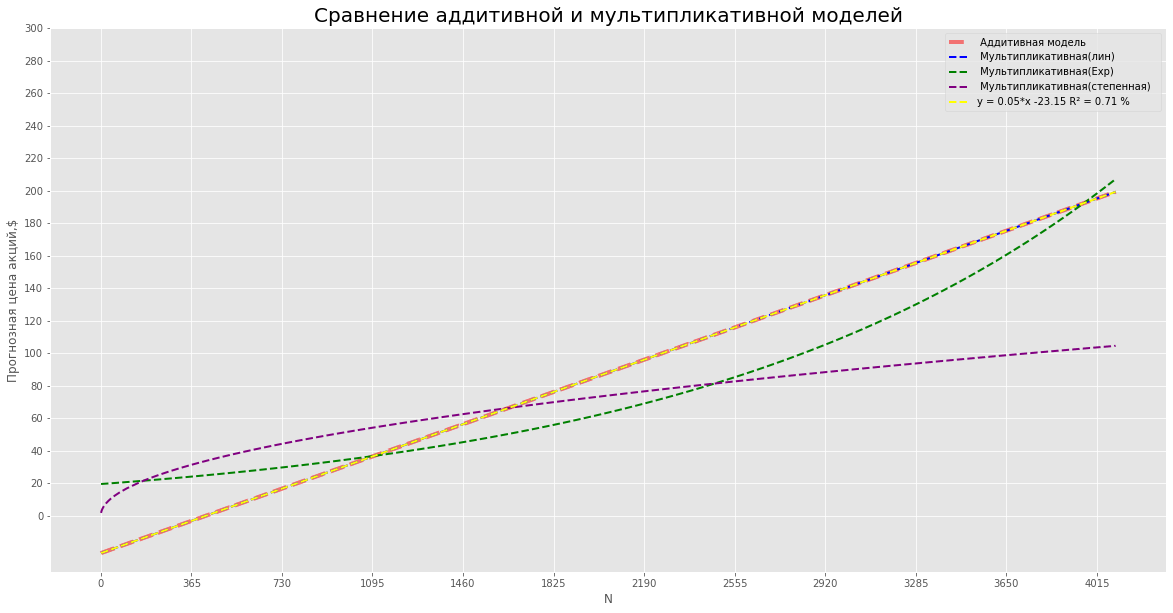

In [12]:
fig  ,ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(Q,TS, linestyle='--', color='Red', marker='',alpha=0.5, linewidth='4',label=' Аддитивная модель', )

ax1.plot(Q,TS_Multi, linestyle='--', color='blue', marker='',linewidth='2',label=' Мультипликативная(лин)  ', )
ax1.plot(Q,exp_TS_Multi, linestyle='--', color='green', marker='',linewidth='2',label=' Мультипликативная(Exp)  ', )

ax1.plot(Q,step_TS_Multi, linestyle='--', color='purple', marker='',linewidth='2',label=' Мультипликативная(степенная)  ', )


x=Q
Y=y = coef_b*x + coef_a

ax1.plot(x,Y, linestyle='--', color='yellow',linewidth='2', alpha=1, label='y = 0.05*x -23.15 R² = 0.71 %')





ax1.set_title('Cравнение аддитивной и мультипликативной моделей',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(0,maxN,365))
ax1.set_yticks(np.arange(0,320,20))



fig.savefig('./graf1.png')

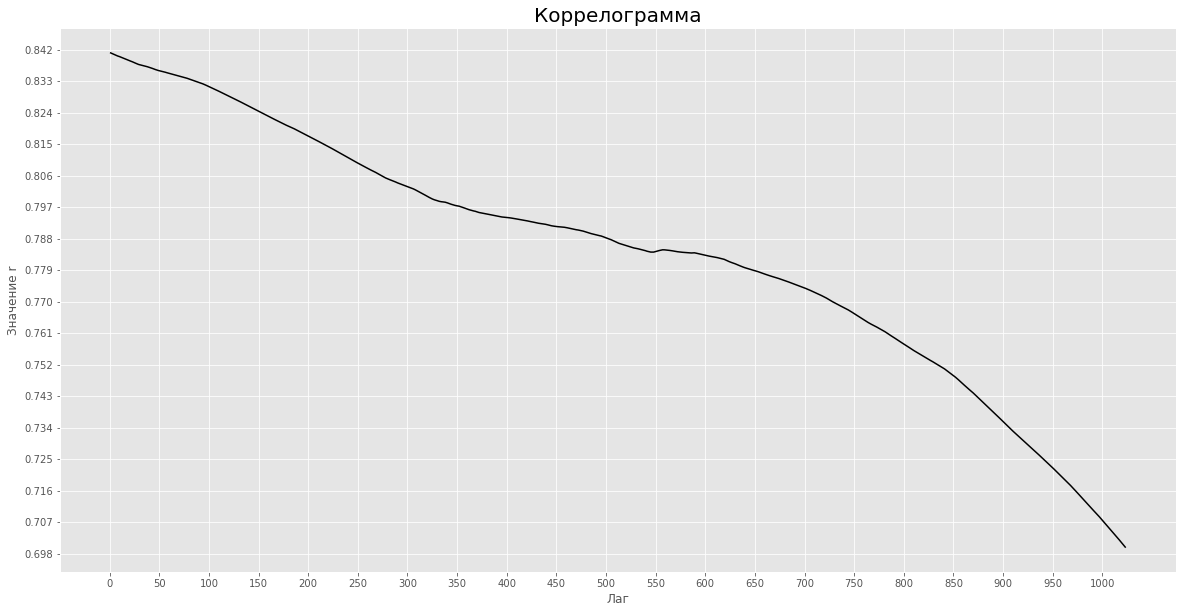

In [13]:
#Построим коррелограмму по исходрным данным
B=df.N[0:maxN]
A=df.Price[0:maxN]

Cor=[]
max=max=df.N.max()
max=int(max/4)
for i in range (0,max+1,1):
    x=np.corrcoef(B,A)[0][1]
    Cor.append(x)
    B.pop(i)
    A.pop(len(A)-1)
    
#print(Cor)

Num=df.N[0:max+1]

fig, ax=plt.subplots(figsize=(20,10))
ax.plot(Num,Cor,linestyle='-', color='black', marker='')
ax.set_title('Коррелограмма',fontsize=20)

ax.set_xlabel("Лаг")
ax.set_ylabel("Значение r")


ax.set_xticks(np.arange(0,max,50))
ax.set_yticks(np.arange(0.698,0.846,0.009))

fig.savefig('./CORR1.png')

In [14]:
#Для борьбы с автокорреляцией:
#прологарифмируем исходные значения зависимой перменной, и прогнозные значения найденные по экспоненциальной модели
#для мультипликативной эскпоненциальной модели
LNYEXP=[]
LNYREAL=[]
for i in range(0,maxN,1):
    LNYEXP.append(math.log(exp_TS_Multi[i]))
    LNYREAL.append(math.log(Price[i]))
#print(LNYEXP)
#print(exp_TS_Multi)


#Найдем остатки от значений найденных по ЭКСПОНЕНЦИАЛЬНОЙ модели после логарфмирования 
LNE_exp=[]
for i in range(0,maxN,1):
    LNE_exp.append(LNYREAL[i]/LNYEXP[i])

#найдем сумму квадратов отклонений  найденных по ЭКСПОНЕНЦИАЛЬНОЙ модели после логарфмирования 
Sum_LNE_exp=0
for i in range(0,maxN,1):
    Sum_LNE_exp+=(LNE_exp[i]*LNE_exp[i])
print( color.BOLD +'Сумма остатков от значений найденных по ЭКСПОНЕНЦИАЛЬНОЙ модели после логарфмирования ='+ color.END,round(Sum_LNE_exp,7))

#найдем сумму(E(i)-E(i-1))^2 для критерия Дарбина-Уотсона
sumd_LNEXP=0
for i in range(1,maxN,1):
    sumd_LNEXP+=((LNE_exp[i]-LNE_exp[i-1])**2)
    #print(sumd)
d_LNEXP=((sumd_LNEXP/Sum_LNE_exp))
print( color.BOLD +'Критерий Дарбина-Уотсона для ЭКСПОНЕНЦИАЛЬНОЙ модели после логарфмирования прогнозных значений='+ color.END,round(d_LNEXP,7))



    
    
    

    

Сумма остатков от значений найденных по ЭКСПОНЕНЦИАЛЬНОЙ модели после логарфмирования = 4151.1381308
Критерий Дарбина-Уотсона для ЭКСПОНЕНЦИАЛЬНОЙ модели после логарфмирования прогнозных значений= 2.59e-05


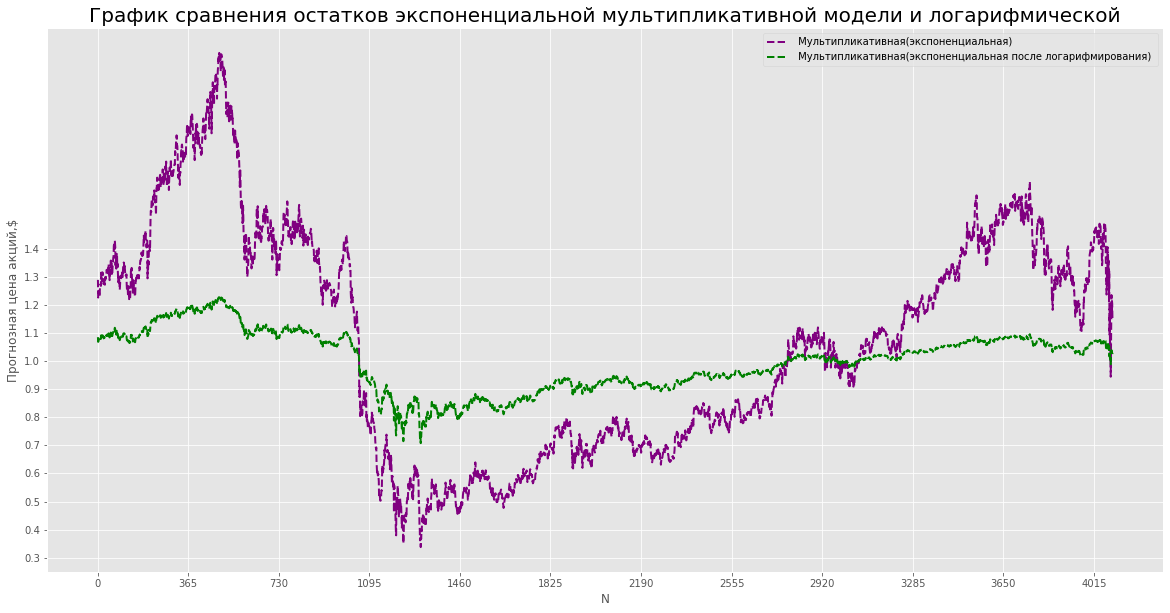

In [15]:
fig  ,ax1 = plt.subplots(figsize=(20, 10))



ax1.plot(Q,exp_E_Multi, linestyle='--', color='purple', marker='',linewidth='2',label=' Мультипликативная(экспоненциальная)  ', )

ax1.plot(Q,LNE_exp, linestyle='--', color='Green', marker='',linewidth='2',label=' Мультипликативная(экспоненциальная после логарифмирования) ', )






ax1.set_title('График сравнения остатков экспоненциальной мультипликативной модели и логарифмической',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(0,maxN,365))
ax1.set_yticks(np.arange(0.3,1.5,0.1))



fig.savefig('./graf1.png')

In [16]:
import statsmodels.api as sm

#define response variable
y = df.Price[0:maxN]

#define predictor variables
x = df.N[0:maxN]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

import statsmodels.stats.diagnostic as dg


LIN_BG=dg.acorr_breusch_godfrey(model, nlags=1)
print( color.BOLD +'Статистика теста множителя Лагранжа для линейной модели='+ color.END,round(LIN_BG[0],7))
print( color.BOLD +'p-значение для теста множителя Лагранжа='+ color.END,round(LIN_BG[1],7))



            

Статистика теста множителя Лагранжа для линейной модели= 4077.000684
p-значение для теста множителя Лагранжа= 0.0


In [17]:
import statsmodels.api as sm

#define response variable
y = LNYREAL

#define predictor variables
x = df.N[0:maxN]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

import statsmodels.stats.diagnostic as dg


LN_LIN_BG=dg.acorr_breusch_godfrey(model, nlags=4)
print( color.BOLD +'Статистика теста множителя Лагранжа для линейной модели после логарфмирования='+ color.END,round(LN_LIN_BG[0],7))
print( color.BOLD +'p-значение для теста множителя Лагранжа='+ color.END,round(LN_LIN_BG[1],7))


print(dg.acorr_breusch_godfrey(model, nlags=4))
            

Статистика теста множителя Лагранжа для линейной модели после логарфмирования= 4079.0433247
p-значение для теста множителя Лагранжа= 0.0
(4079.043324735798, 0.0, 380106.47702259076, 0.0)


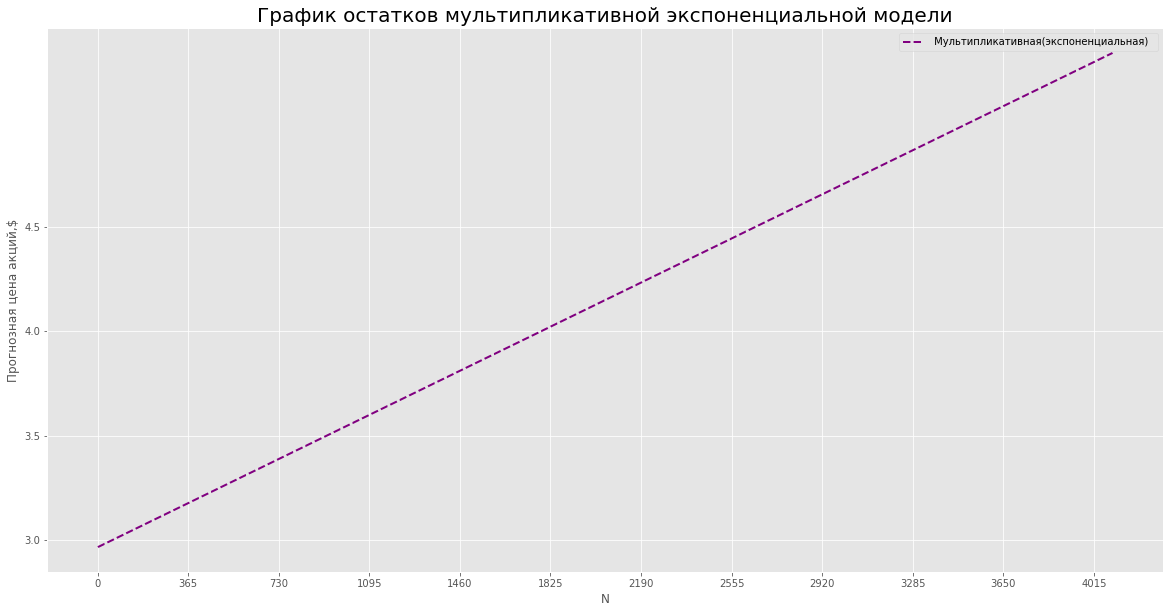

In [18]:
fig  ,ax1 = plt.subplots(figsize=(20, 10))



ax1.plot(Q,LNYEXP, linestyle='--', color='purple', marker='',linewidth='2',label=' Мультипликативная(экспоненциальная)  ', )







ax1.set_title('График остатков мультипликативной экспоненциальной модели',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(0,maxN,365))
ax1.set_yticks(np.arange(3,5,0.5))



fig.savefig('./graf1.png')

In [26]:
#Построим линейную мультипликативную модель по логарифмированным исходным данным

#МНК для исходных данных
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([]).reshape((-1, 1))
y = np.array([])




for i in range(0,maxN,1):
    x=np.append(x,B[i]).reshape((-1, 1))

for i in range(0,maxN,1):
    y=np.append(y,LNYREAL[i])

model = LinearRegression()
model.fit(x, y)

round(2.65, 1)

coef_deter_LNLIN = model.score(x, y)
print(color.BOLD +'Коэффициент детерминации линйеной регресии ='+ color.END, round(coef_deter_LNLIN,2),'%')

coef_a_LNLIN=model.intercept_
coef_b_LNLIN=model.coef_[0]
print( color.BOLD + 'Оценка параметра a линйеной регресии ='+ color.END, round(coef_a_LNLIN,5))
print( color.BOLD +'Оценка параметра b линйеной регресии ='+ color.END,round(coef_b_LNLIN,5))


LNLIN_T=[]

for i in range(1,maxN+1,1):
    
    LNLIN_T.append(coef_a_LNLIN+i*coef_b_LNLIN)





#Находим прогнозные значения по   мультипликативной модели ряда
TS_Multi_LNLIN=[]
for i in range(0,maxN,1):
    if((i-5)%5==0):
        TS_Multi_LNLIN.append(LNLIN_T[i]*CAMSum1)
    if((i-5)%5==1):
        TS_Multi_LNLIN.append(LNLIN_T[i]*CAMSum2)
    if((i-5)%5==2):
        TS_Multi_LNLIN.append(LNLIN_T[i]*CAMSum3)
    if((i-5)%5==3):
        TS_Multi_LNLIN.append(LNLIN_T[i]*CAMSum4)
    if((i-5)%5==4):
        TS_Multi_LNLIN.append(LNLIN_T[i]*CAMSum5)
#print(TS_Multi)

#Находим случайную составляющую E

E_Multi_LNLIN=[]

for i in range(0,maxN,1):
    E_Multi_LNLIN.append(LNYREAL[i]/TS_Multi_LNLIN[i])
#print(E_Multi)     


#найдем сумму квадратов отклонениц для линейной Мультипликативной модели
RSS_Multi_LNLIN=0
for i in range (0,maxN,1):
    RSS_Multi_LNLIN+=(E_Multi_LNLIN[i]*E_Multi_LNLIN[i])


print( color.BOLD +'Сумма квадратов отклонений линейной мультипликативной  модели ='+ color.END,round(RSS_Multi_LNLIN,2))




#Найдем критерий Дарбина_Уотсона
#найдем сумму(E(i)-E(i-1))^2
sumd_Multi_LNLIN=0
for i in range(1,maxN,1):
    sumd_Multi_LNLIN+=((E_Multi_LNLIN[i]-E_Multi_LNLIN[i-1])**2)
    #print(sumd_Multi)

d_Multi_LNLIN=((sumd_Multi_LNLIN/RSS_Multi_LNLIN))
print( color.BOLD +'Критерий Дарбина-Уотсона='+ color.END,round(d_Multi_LNLIN,6))

TS_Multi_LNLIN_EXP=[]
for i in range(0,maxN,1):
    TS_Multi_LNLIN_EXP.append(math.exp(TS_Multi_LNLIN[i]))

    



Коэффициент детерминации линйеной регресии = 0.75 %
Оценка параметра a линйеной регресии = 2.96573
Оценка параметра b линйеной регресии = 0.00058
Сумма квадратов отклонений линейной мультипликативной  модели = 4151.14
Критерий Дарбина-Уотсона= 2.6e-05


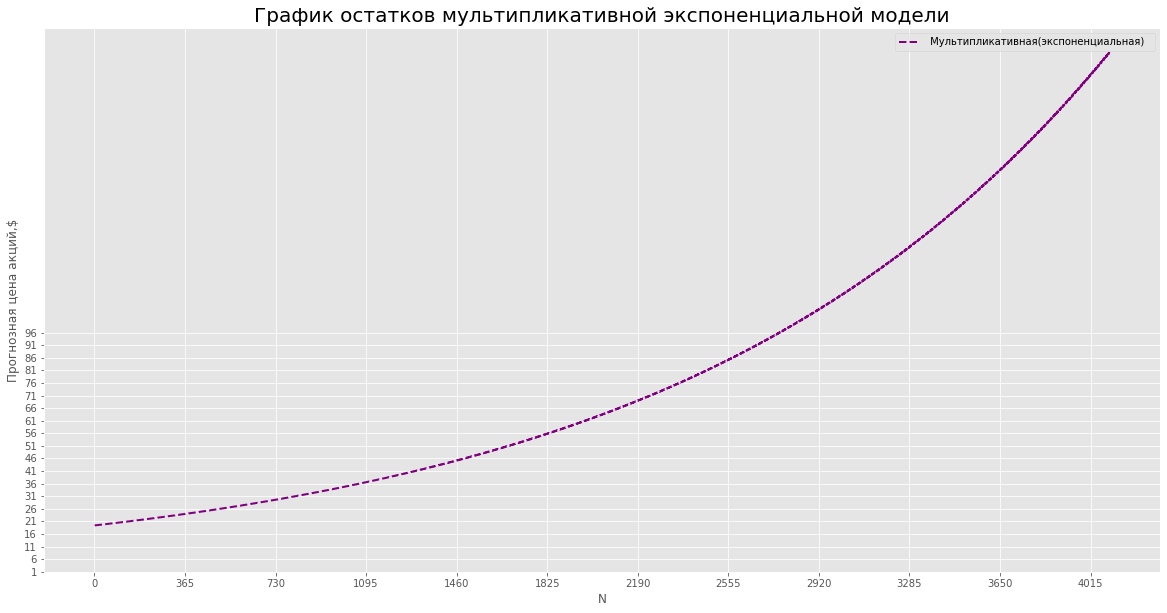

In [27]:
fig  ,ax1 = plt.subplots(figsize=(20, 10))



ax1.plot(Q,TS_Multi_LNLIN_EXP, linestyle='--', color='purple', marker='',linewidth='2',label=' Мультипликативная(экспоненциальная)  ', )







ax1.set_title('График остатков мультипликативной экспоненциальной модели',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(0,maxN,365))
ax1.set_yticks(np.arange(1,100,5))



fig.savefig('./graf1.png')

In [53]:
import math 
#Расчитаем прогнозные значения на 90 дней вперед

prgn=[]
for i in range(maxN+1,maxN+91,1):
    prgn.append(i) 


#Расчитаем прогнозные значения по экспоненциальной модели 
exp_T_prg=[]

for i in range(0,90,1):
    
    exp_T_prg.append(math.exp(exp_coef_a+exp_coef_b*(prgn[i])))
    


#Находим прогнозные значения по exp  мультипликативной модели ряда
exp_TS_Multi_prg=[]
for i in range(0,90,1):
    if((i-5)%5==0):
        exp_TS_Multi_prg.append(exp_T_prg[i]*CAMSum1)
    if((i-5)%5==1):
        exp_TS_Multi_prg.append(exp_T_prg[i]*CAMSum2)
    if((i-5)%5==2):
        exp_TS_Multi_prg.append(exp_T_prg[i]*CAMSum3)
    if((i-5)%5==3):
        exp_TS_Multi_prg.append(exp_T_prg[i]*CAMSum4)
    if((i-5)%5==4):
        exp_TS_Multi_prg.append(exp_T_prg[i]*CAMSum5)

print( color.BOLD +'Прогнозные значения с доверительным интервалом и уровнем значимости 95%'+ color.END)
myp=0
myp= math.sqrt(RSS_exp/(maxN-2))

dyp005=myp*1.960544455
dyp01=myp*1.645226454

for  i in range (0,len(prgn),1):
    print('[',exp_TS_Multi_prg[i]-dyp005,';',exp_TS_Multi_prg[i]+dyp005,']')

print( color.BOLD +'Прогнозные значения с доверительным интервалом и уровнем значимости 95%'+ color.END)

for  i in range (0,len(prgn),1):
    print('[',exp_TS_Multi_prg[i]-dyp01,';',exp_TS_Multi_prg[i]+dyp01,']')
    

topprogn=[]
for i in range(0,90,1):
    topprogn.append(exp_TS_Multi_prg[i]+dyp005)
    
bottomprogn=[]
for i in range(0,90,1):
    bottomprogn.append(exp_TS_Multi_prg[i]-dyp005)
    

Прогнозные значения с доверительным интервалом и уровнем значимости 95%
[ 204.98373734034 ; 209.48180893138138 ]
[ 205.1538483914843 ; 209.65191998252567 ]
[ 205.18963075678388 ; 209.68770234782525 ]
[ 205.34525848479424 ; 209.8433300758356 ]
[ 205.54331036015577 ; 210.04138195119714 ]
[ 205.5844216161367 ; 210.08249320717806 ]
[ 205.75502575064812 ; 210.25309734168948 ]
[ 205.79091183460142 ; 210.28898342564278 ]
[ 205.94699066466322 ; 210.44506225570458 ]
[ 206.14561661257844 ; 210.6436882036198 ]
[ 206.18684703351892 ; 210.68491862456028 ]
[ 206.35794568064742 ; 210.85601727168878 ]
[ 206.39393578389274 ; 210.8920073749341 ]
[ 206.55046702356904 ; 211.0485386146104 ]
[ 206.74966870804306 ; 211.24774029908443 ]
[ 206.79101863935426 ; 211.28909023039563 ]
[ 206.96261323249274 ; 211.4606848235341 ]
[ 206.99870765654012 ; 211.4967792475815 ]
[ 207.15569261718386 ; 211.65376420822523 ]
[ 207.3554717070449 ; 211.85354329808627 ]
[ 207.39694149513937 ; 211.89501308618074 ]
[ 207.5690334718

In [59]:
#Расчитаем прогнозные значения по линейной модели 
T_prg=[]
for i in range(0,90,1):
    T_prg.append(coef_a+coef_b*(prgn[i]))

#Находим прогнозные значения по  мультипликативной модели ряда
TS_Multi_prg=[]
for i in range(0,90,1):
    if((i-5)%5==0):
        TS_Multi_prg.append(T_prg[i]*CAMSum1)
    if((i-5)%5==1):
        TS_Multi_prg.append(T_prg[i]*CAMSum2)
    if((i-5)%5==2):
        TS_Multi_prg.append(T_prg[i]*CAMSum3)
    if((i-5)%5==3):
        TS_Multi_prg.append(T_prg[i]*CAMSum4)
    if((i-5)%5==4):
        TS_Multi_prg.append(T_prg[i]*CAMSum5)



print( color.BOLD +'Прогнозные значения с доверительным интервалом и уровнем значимости 95%'+ color.END)
myp_multi= math.sqrt(RSS_Multi/(maxN-2))

dyp005_multi=myp_multi*1.960544455
dyp01_multi=myp_multi*1.645226454

for  i in range (0,len(prgn)-1,1):
    print('[',TS_Multi_prg[i]-dyp005_multi,';',TS_Multi_prg[i]+dyp005_multi,']')

    

print( color.BOLD +'Прогнозные значения с доверительным интервалом и уровнем значимости 90%'+ color.END)

for  i in range (0,len(prgn)-1,1):
    print('[',TS_Multi_prg[i]-dyp01_multi,';',TS_Multi_prg[i]+dyp01_multi,']')
    
    
topprogn_multi=[]
for i in range(0,90,1):
    topprogn_multi.append(TS_Multi_prg[i]+dyp005_multi)
    
bottomprogn_multi=[]
for i in range(0,90,1):
    bottomprogn_multi.append(TS_Multi_prg[i]-dyp005_multi)
    
    
df = pd.read_csv("UnitedHealthGroup_90.csv", sep = ";")
    
Price_90=df.Price[0:89]
N_90=df.N[0:89]
for i in range(0,df.N.max(),1):
    N_90[i]=N_90[i]+4090


Прогнозные значения с доверительным интервалом и уровнем значимости 95%
[ 106.59285942187635 ; 292.01130146417603 ]
[ 106.6954148524518 ; 292.1138568947515 ]
[ 106.66876507725301 ; 292.0872071195527 ]
[ 106.75725123469864 ; 292.17569327699835 ]
[ 106.88640033648507 ; 292.30484237878477 ]
[ 106.86473313888654 ; 292.2831751811862 ]
[ 106.96735427620065 ; 292.38579631850035 ]
[ 106.94059401547894 ; 292.3590360577786 ]
[ 107.02912667944072 ; 292.4475687217404 ]
[ 107.15837767142189 ; 292.5768197137216 ]
[ 107.13660685589672 ; 292.5550488981964 ]
[ 107.23929369994953 ; 292.6577357422492 ]
[ 107.21242295370483 ; 292.6308649960045 ]
[ 107.3010021241828 ; 292.7194441664825 ]
[ 107.43035500635874 ; 292.8487970486584 ]
[ 107.40848057290687 ; 292.82692261520657 ]
[ 107.51123312369843 ; 292.9296751659981 ]
[ 107.48425189193075 ; 292.90269393423046 ]
[ 107.57287756892488 ; 292.9913196112246 ]
[ 107.70233234129559 ; 293.1207743835953 ]
[ 107.68035428991705 ; 293.09879633221675 ]
[ 107.78317254744731

Прогнозные значения с доверительным интервалом и уровнем значимости 95% по линейной мультпликативной модели ряда


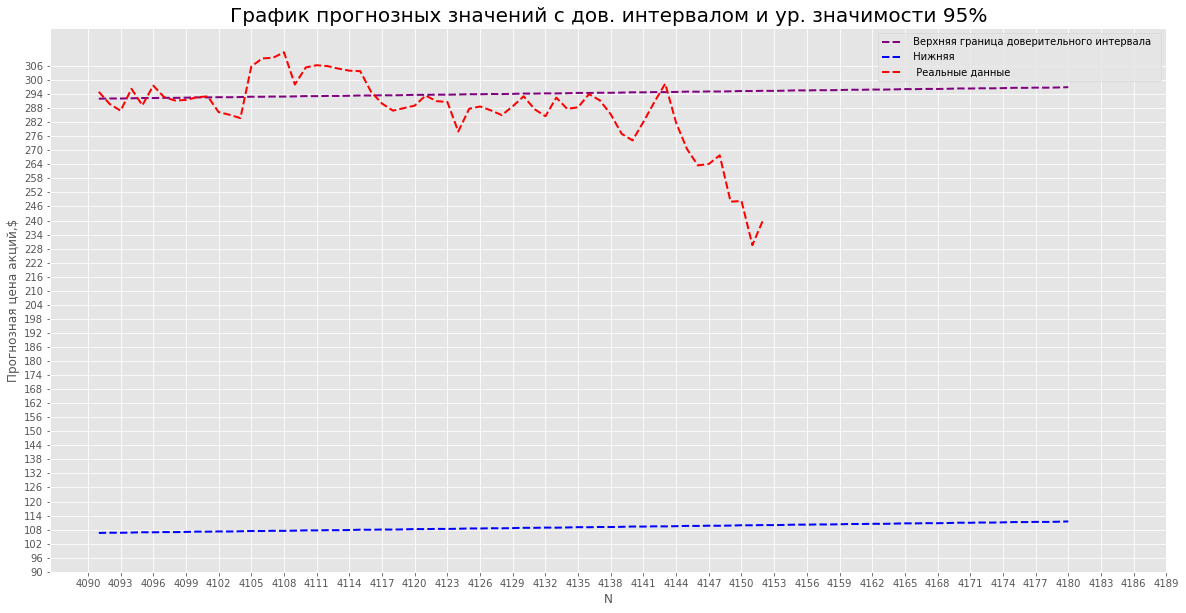

In [65]:

fig  ,ax1 = plt.subplots(figsize=(20, 10))



ax1.plot(prgn,topprogn_multi, linestyle='--', color='purple', marker='',linewidth='2',label=' Верхняя граница доверительного интервала  ', )

ax1.plot(prgn,bottomprogn_multi, linestyle='--', color='blue', marker='',linewidth='2',label=' Нижняя   ', )

ax1.plot(N_90,Price_90, linestyle='--', color='red', marker='',linewidth='2',label='  Реальные данные  ', )








ax1.set_title('График прогнозных значений с дов. интервалом и ур. значимости 95%',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(maxN,maxN+100,3))
ax1.set_yticks(np.arange(90,310,6))



fig.savefig('./graf1.png')
print( color.BOLD +'Прогнозные значения с доверительным интервалом и уровнем значимости 95% по линейной мультпликативной модели ряда'+ color.END)

Прогнозные значения с доверительным интервалом и уровнем значимости 905% по экспоненциальной модели ряда


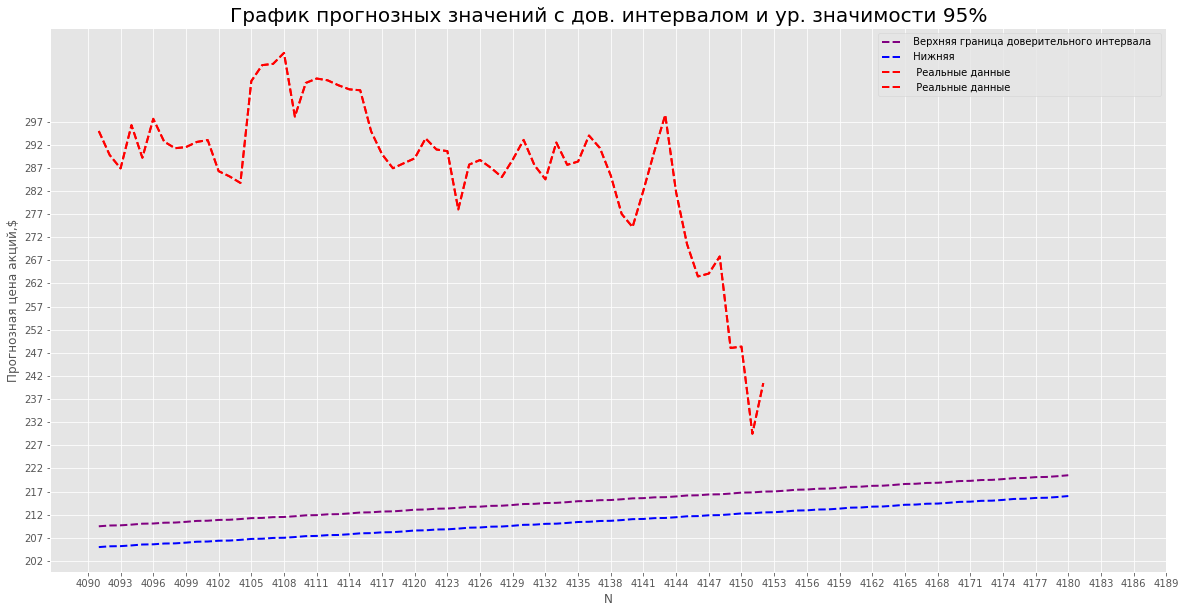

In [64]:

fig  ,ax1 = plt.subplots(figsize=(20, 10))



ax1.plot(prgn,topprogn, linestyle='--', color='purple', marker='',linewidth='2',label=' Верхняя граница доверительного интервала  ', )

ax1.plot(prgn,bottomprogn, linestyle='--', color='blue', marker='',linewidth='2',label=' Нижняя   ', )


ax1.plot(N_90,Price_90, linestyle='--', color='red', marker='',linewidth='2',label='  Реальные данные  ', )
ax1.plot(N_90,Price_90, linestyle='--', color='red', marker='',linewidth='2',label='  Реальные данные  ', )







ax1.set_title('График прогнозных значений с дов. интервалом и ур. значимости 95%',fontsize=20)


ax1.set_xlabel("N")
ax1.set_ylabel("Прогнозная цена акций,$")
ax1.legend(loc='best')

ax1.set_xticks(np.arange(maxN,maxN+100,3))
ax1.set_yticks(np.arange(202,300,5))



fig.savefig('./graf1.png')
print( color.BOLD +'Прогнозные значения с доверительным интервалом и уровнем значимости 905% по экспоненциальной модели ряда'+ color.END)